In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
df = pd.read_csv('Coffee_Stores_Data.csv')

In [211]:
df.head()

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,21,0,2.0,0.000000
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969


In [212]:
df.shape

(1259776, 15)

In [213]:
df['StoreID'].unique()

array([  2,   6,  10,  17,  18,  20,  21,  22,  29,  30,  32,  34,  36,
        40,  41,  43,  48,  55,  57,  59,  60,  61,  62,  64,  65,  72,
        73,  76,  77,  81,  82,  83,  85,  86,  93,  94,  95,  97, 101,
       102, 103, 112, 115, 116, 117, 119, 120, 122, 123, 124, 127, 128,
       131, 132, 134, 135, 136, 137, 138, 141, 144, 151, 164, 166, 167,
       169, 171, 173, 176, 177, 178, 179, 181, 183, 184, 186, 189, 190,
       191, 192, 193, 200, 201, 202, 206, 211, 216, 218, 222, 235, 243,
       244, 248, 309, 310, 313, 314, 315, 317, 319, 328, 329, 331, 332,
       334, 335, 336, 341, 344, 346, 348, 350, 356, 359, 363, 365, 367,
       374, 375, 376, 377, 378, 379, 381, 383, 385, 391, 392, 393, 397,
       400, 401], dtype=int64)

In [214]:
len(df['StoreID'].unique())

132

In [215]:
df['PLU'].unique()

array([3000227,  830620,    6228,   12216, 3000277, 3000278,  851004,
        820602,  810407,  820801,  820902,  820224,  810703, 3000210,
       3000166, 3000096,  820221, 3000159, 3000162, 3000181, 3000207,
       3000209, 3000211, 3000212, 3000214, 3000024,  841402, 3000281,
       3000297, 3000296, 3000293], dtype=int64)

In [216]:
df['BusinessDate'].min()

'2019-06-29'

In [217]:
df['BusinessDate'].max()

'2020-06-29'

In [218]:
df['ItemType'].unique()

array(['Unassigned', 'Core', 'Seasonal'], dtype=object)

In [219]:
df['CategoryLvl1Desc'].unique()

array(['Food'], dtype=object)

In [220]:
df['CategoryLvl2Desc'].unique()

array(['Cold Case', 'Bake Case'], dtype=object)

In [221]:
df['CategoryLvl3Desc'].unique()

array(['Ready to Eat', 'Muffins & Scones', 'Ready to Drink', 'Bagels',
       'Pastries', 'Cookies & Bars', 'Cakes & Breads'], dtype=object)

In [12]:
#products,(PLU) 
#inventory patterns 
#stock out patterns(StockedOut)
#missed sales(MissedSales)

In [222]:
len(df['Description'].unique())

31

In [223]:
df_static = df[['PLU','Description','ItemType','CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc']].drop_duplicates()

In [224]:
df_static.head()

,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc
0,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat
1,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones
2,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink
3,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink
4,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat


In [225]:
df_dynamic = df.drop(['Description','ItemType','CategoryLvl1Desc','CategoryLvl2Desc','CategoryLvl3Desc','GroupID'],axis=1)
df_dynamic['BusinessDate'] = df_dynamic['BusinessDate'].apply(lambda x:int("".join(x.split("-")[0:2])))

In [226]:
df_dynamic.head()

,StoreID,BusinessDate,PLU,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,MissedSales
0,2,201906,3000227,0.0,3.0,0.0,21,0,0.000000
1,2,201906,830620,4.0,2.0,0.0,10,0,0.000000
2,2,201906,6228,0.0,1.0,9.0,13,0,0.000000
3,2,201906,12216,0.0,0.0,27.0,0,0,0.000000
4,2,201906,3000277,0.0,3.0,0.0,11,1,0.578969


In [227]:
df_dynamic.shape

(1259776, 9)

In [228]:
df_dynamic.drop_duplicates().shape

(1049006, 9)

In [229]:
#Top Sales Stores
df_store_SQ = pd.DataFrame(df_dynamic.groupby(['StoreID'])['SoldQuantity'].sum()).sort_values(by=['SoldQuantity'],ascending=False)

<AxesSubplot:xlabel='SoldQuantity', ylabel='Count'>

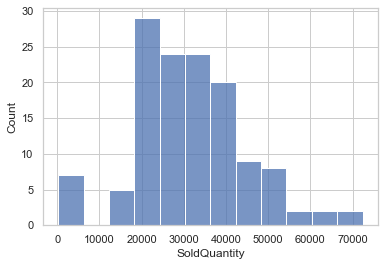

In [230]:
sns.histplot(df_store_SQ.SoldQuantity)

In [231]:
#Top Sales inv
df_inv_SQ = pd.DataFrame(df_dynamic.groupby(['PLU'])['SoldQuantity'].sum()).sort_values(by=['SoldQuantity'],ascending=False).reset_index()

<AxesSubplot:xlabel='SoldQuantity', ylabel='Count'>

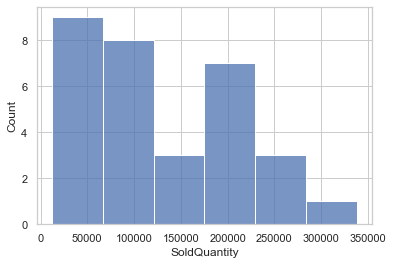

In [232]:
sns.histplot(df_inv_SQ.SoldQuantity)

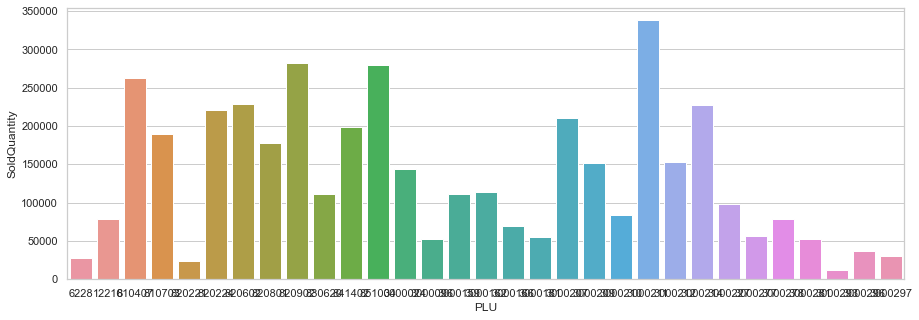

In [233]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="PLU", y="SoldQuantity", data=df_inv_SQ)

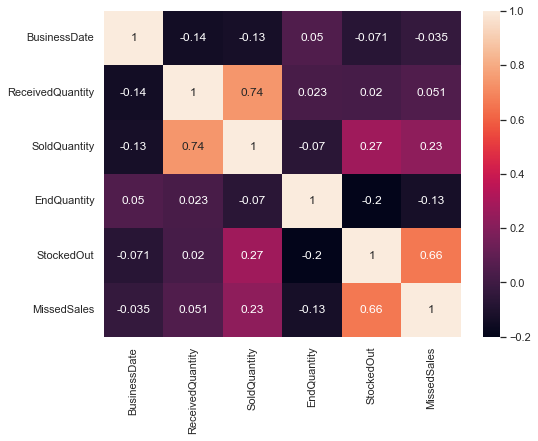

In [234]:
fig, ax = plt.subplots(figsize=(8,6))

df_temp = df_dynamic[['BusinessDate','ReceivedQuantity', 'SoldQuantity',
       'EndQuantity', 'StockedOut', 'MissedSales']]

corrMatrix = df_temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [235]:
df_dynamic.head()

,StoreID,BusinessDate,PLU,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,MissedSales
0,2,201906,3000227,0.0,3.0,0.0,21,0,0.000000
1,2,201906,830620,4.0,2.0,0.0,10,0,0.000000
2,2,201906,6228,0.0,1.0,9.0,13,0,0.000000
3,2,201906,12216,0.0,0.0,27.0,0,0,0.000000
4,2,201906,3000277,0.0,3.0,0.0,11,1,0.578969


In [236]:
df_temp = pd.DataFrame(df_dynamic.groupby(['BusinessDate'])['SoldQuantity'].sum()).sort_values(by=['BusinessDate'],ascending=True).reset_index()

In [237]:
df_temp

,BusinessDate,SoldQuantity
0,201906,21823.0
1,201907,375855.0
2,201908,393403.0
3,201909,372529.0
4,201910,388288.0
5,201911,389199.0
6,201912,401845.0
7,202001,411074.0
8,202002,400989.0
9,202003,321544.0


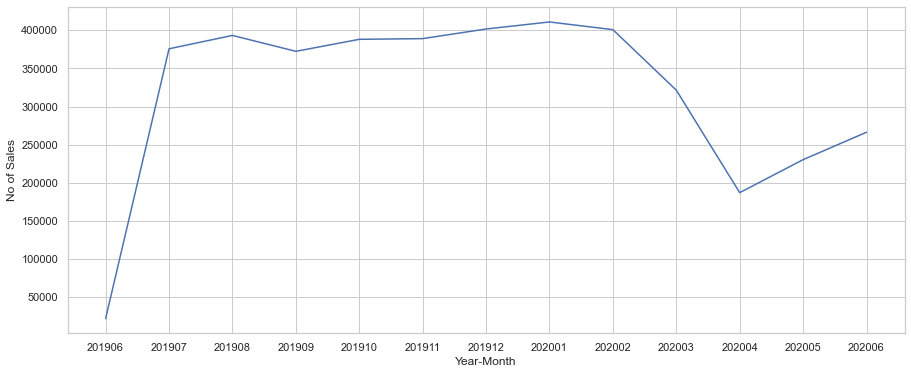

In [238]:
plt.figure(figsize=(15,6))
plt.xlabel("Year-Month")
plt.ylabel("No of Sales")
ax = plt.plot(df_temp['BusinessDate'].astype('string'),df_temp['SoldQuantity'],)

In [245]:
df_temp = pd.DataFrame(df_dynamic.groupby(['BusinessDate','PLU'])['SoldQuantity'].sum()).sort_values(by=['BusinessDate'],ascending=True).reset_index()

<AxesSubplot:xlabel='BusinessDate', ylabel='SoldQuantity'>

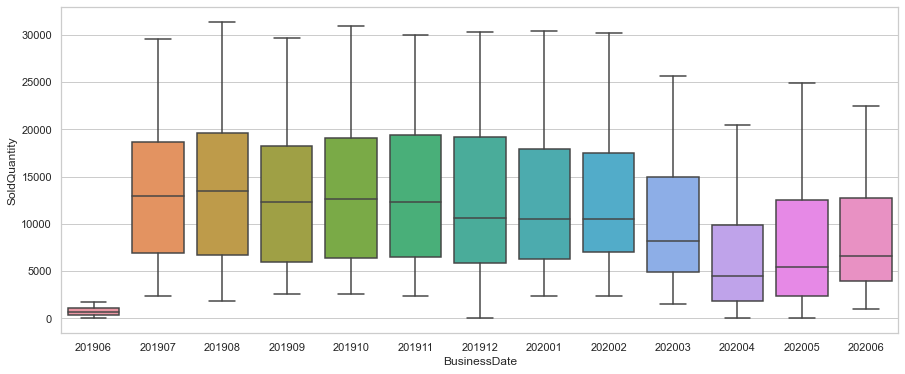

In [246]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(x='BusinessDate',y="SoldQuantity",data=df_temp)

In [249]:
df_temp = pd.DataFrame(df_dynamic.groupby(['BusinessDate','PLU'])['ReceivedQuantity'].sum()).sort_values(by=['BusinessDate'],ascending=True).reset_index()

<AxesSubplot:xlabel='BusinessDate', ylabel='ReceivedQuantity'>

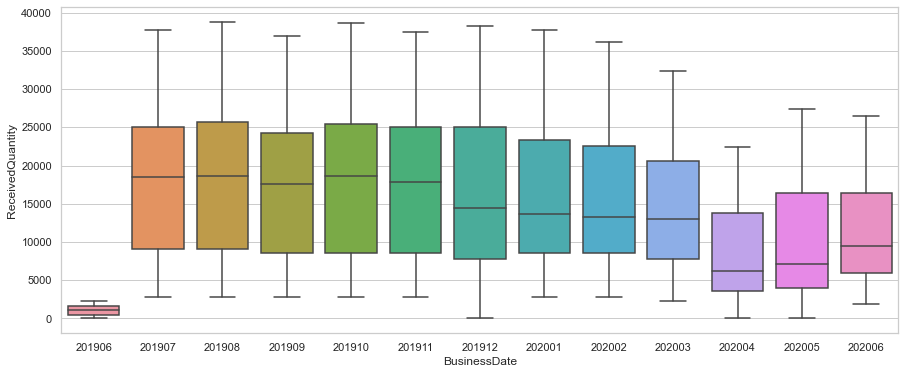

In [250]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(x='BusinessDate',y="ReceivedQuantity",data=df_temp)

In [251]:
df_temp = pd.DataFrame(df_dynamic.groupby(['BusinessDate','PLU'])['EndQuantity'].sum()).sort_values(by=['BusinessDate'],ascending=True).reset_index()

<AxesSubplot:xlabel='BusinessDate', ylabel='EndQuantity'>

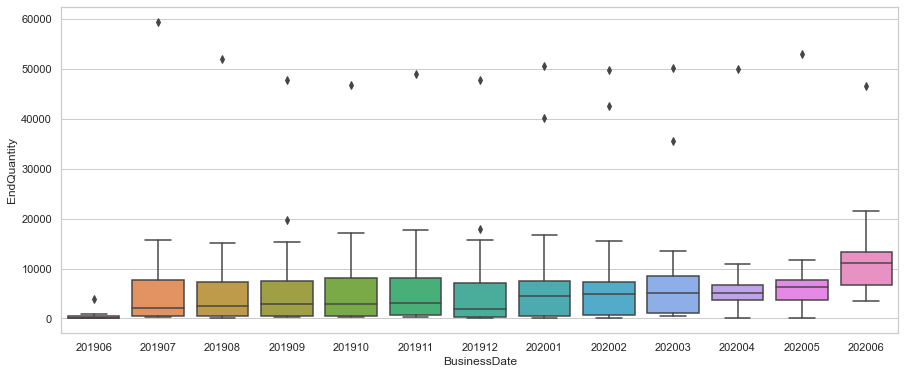

In [253]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(x='BusinessDate',y="EndQuantity",data=df_temp)

In [254]:
df_temp = pd.DataFrame(df_dynamic.groupby(['BusinessDate','PLU'])['StockedOut'].sum()).sort_values(by=['BusinessDate'],ascending=True).reset_index()

<AxesSubplot:xlabel='BusinessDate', ylabel='StockedOut'>

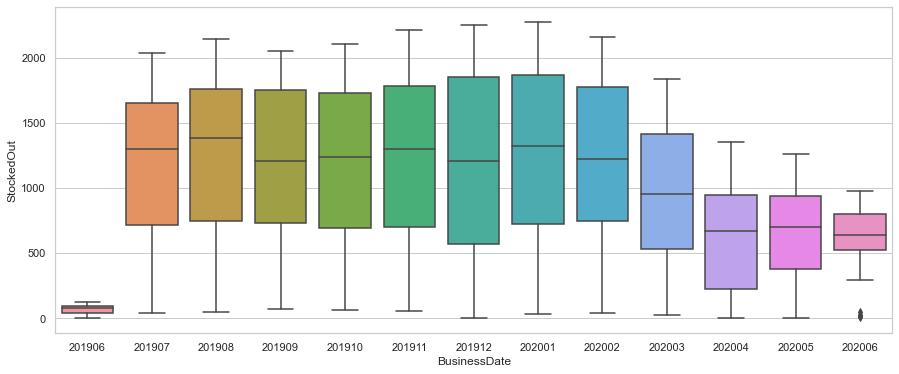

In [255]:
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.boxplot(x='BusinessDate',y="StockedOut",data=df_temp)